# Minnesota Timberwolves and Crime
## The effect a Minnesota Timberwolves win/lose streak has on Crime in Minnesota

### Contents
- Data Preparation
- Minnesota Timberwolves results
- Crime in Minnesota
- Minnesota Timberwolves Form
- Minnesota Timberwolves Streaks

In [1]:
import os.path
import datetime
import pandas as pd
import numpy as np
import matplotlib
import pylab
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
%matplotlib inline

# Data Preparation

In [2]:
if not os.path.exists( "../../data/prep/600_NBA.csv" ):
    print("Missing dataset file")

In [3]:
nba = pd.read_csv("../../data/prep/600_NBA.csv", index_col="Date", parse_dates=True)
nba.shape

(5354, 8)

Sorting the dates of the games...

In [4]:
nba.sort_index(ascending=True)

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference
Date,,,,,,,,
2007-10-30,7:30 pm,Houston Rockets,95,Los Angeles Lakers,93,18997.0,Away Win,2
2007-10-31,8:30 pm,Seattle SuperSonics,103,Denver Nuggets,120,19380.0,Home Win,-17
2007-10-31,7:30 pm,Chicago Bulls,103,New Jersey Nets,112,17342.0,Home Win,-9
2007-10-31,7:00 pm,Philadelphia 76ers,97,Toronto Raptors,106,19800.0,Home Win,-9
2007-11-02,8:00 pm,Washington Wizards,83,Boston Celtics,103,18624.0,Home Win,-20
2007-11-02,7:30 pm,Philadelphia 76ers,96,Chicago Bulls,85,22034.0,Away Win,11
2007-11-02,7:30 pm,Golden State Warriors,114,Los Angeles Clippers,120,19060.0,Home Win,-6
2007-11-02,7:00 pm,Denver Nuggets,99,Minnesota Timberwolves,91,19443.0,Away Win,8
2007-11-02,7:30 pm,Los Angeles Lakers,119,Phoenix Suns,98,18422.0,Away Win,21


# Minnesota Timberwolves

We'll look at the Minnesota Timberwolves...

In [5]:
wol = nba[(nba.values  == "Minnesota Timberwolves")]

In [6]:
wol.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference
Date,,,,,,,,
2007-11-02,7:00 pm,Denver Nuggets,99,Minnesota Timberwolves,91,19443.0,Away Win,8
2007-11-04,6:00 pm,Minnesota Timberwolves,93,New York Knicks,97,19763.0,Home Win,-4
2007-11-06,7:00 pm,Orlando Magic,111,Minnesota Timberwolves,103,12003.0,Away Win,8
2007-11-09,7:30 pm,Minnesota Timberwolves,93,Los Angeles Lakers,107,18997.0,Home Win,-14
2007-11-10,7:00 pm,Minnesota Timberwolves,93,Sacramento Kings,100,13170.0,Home Win,-7


We'll look at their home games first. We assign 1 point to a win, 0 for a draw and -1 for a loss. This will be important when we look at the form and streaks. 

In [7]:
wolHome = wol[wol['Home/Neutral'] == 'Minnesota Timberwolves']

In [8]:
conditions = [
    (wolHome['PTS.1'] > wolHome['PTS']),
    (wolHome['PTS'] == wolHome['PTS.1'])]
choices = [1, 0]
wolHome['wol Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [9]:
wolHome.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,wol Res
Date,,,,,,,,,
2007-11-02,7:00 pm,Denver Nuggets,99,Minnesota Timberwolves,91,19443.0,Away Win,8,-1
2007-11-06,7:00 pm,Orlando Magic,111,Minnesota Timberwolves,103,12003.0,Away Win,8,-1
2007-11-14,7:00 pm,Sacramento Kings,103,Minnesota Timberwolves,108,11656.0,Home Win,-5,1
2007-11-16,7:00 pm,Washington Wizards,105,Minnesota Timberwolves,89,11783.0,Away Win,16,-1
2007-11-17,7:00 pm,New Orleans Hornets,100,Minnesota Timberwolves,82,15324.0,Away Win,18,-1


and now their away games...

In [10]:
wolAway = wol[wol['Visitor/Neutral'] == 'Minnesota Timberwolves']

In [11]:
conditions = [
    (wolAway['PTS'] > wolAway['PTS.1']),
    (wolAway['PTS'] == wolAway['PTS.1'])]
choices = [1, 0]
wolAway['wol Res'] = np.select(conditions, choices, default=-1)

C:\Users\Cathal Mc Connell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [12]:
wolAway.head()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,wol Res
Date,,,,,,,,,
2007-11-04,6:00 pm,Minnesota Timberwolves,93,New York Knicks,97,19763.0,Home Win,-4,-1
2007-11-09,7:30 pm,Minnesota Timberwolves,93,Los Angeles Lakers,107,18997.0,Home Win,-14,-1
2007-11-10,7:00 pm,Minnesota Timberwolves,93,Sacramento Kings,100,13170.0,Home Win,-7,-1
2007-11-23,7:00 pm,Minnesota Timberwolves,93,Denver Nuggets,99,17097.0,Home Win,-6,-1
2007-11-26,7:00 pm,Minnesota Timberwolves,103,New Orleans Hornets,94,8393.0,Away Win,9,1


We'll combine the 2 dataframes

In [13]:
fram1 = [wolHome, wolAway]
wolRes = pd.concat(fram1, axis = 0)

In [14]:
wolRes.tail()

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,wol Res
Date,,,,,,,,,
2017-04-04,10:30 pm,Minnesota Timberwolves,107,Golden State Warriors,121,19596.0,Home Win,-14,-1
2017-04-06,10:30 pm,Minnesota Timberwolves,98,Portland Trail Blazers,105,19393.0,Home Win,-7,-1
2017-04-07,9:00 pm,Minnesota Timberwolves,113,Utah Jazz,120,19911.0,Home Win,-7,-1
2017-04-09,9:30 pm,Minnesota Timberwolves,109,Los Angeles Lakers,110,18997.0,Home Win,-1,-1
2017-04-12,8:00 pm,Minnesota Timberwolves,118,Houston Rockets,123,18055.0,Home Win,-5,-1


The index is sorted again

In [15]:
wolRes = wolRes.sort_index()

A sample plot of a months games...

<function matplotlib.pyplot.show>

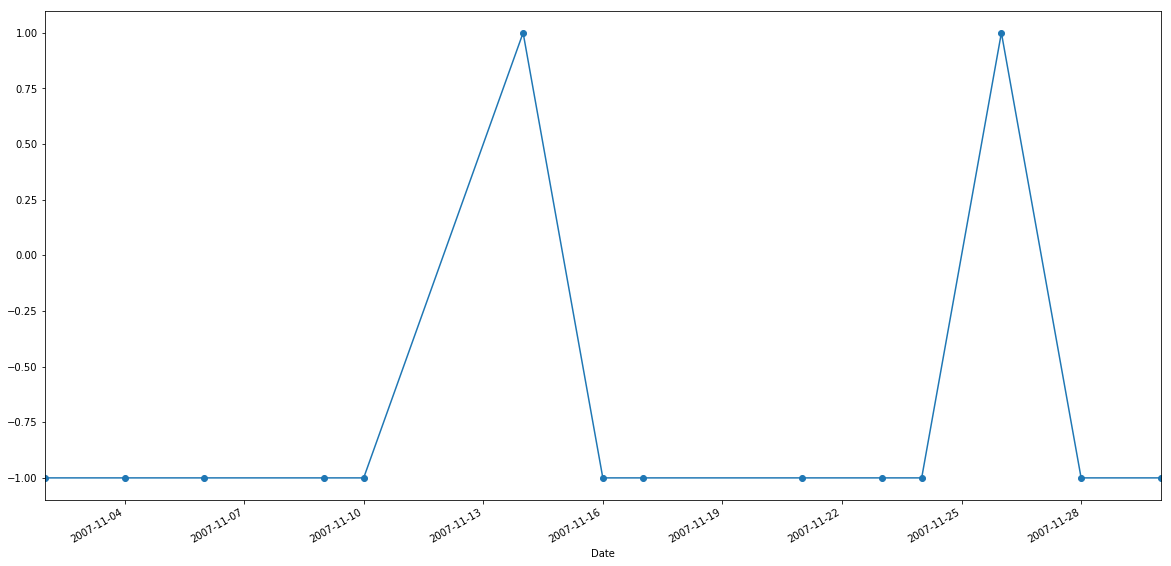

In [16]:
ctest2 = wolRes.loc['2007-11-02':'2007-11-30']
ctest2['wol Res'].plot(style='o-', figsize = (20, 10))
plt.show

In [17]:
ctest3 = wolRes.loc['2009-11-02':'2010-06-30']
ctest3

,Start (ET),Visitor/Neutral,PTS,Home/Neutral,PTS.1,Attend.,Result,Difference,wol Res
Date,,,,,,,,,
2009-11-02,7:30 pm,Minnesota Timberwolves,90,Los Angeles Clippers,93,13614.0,Home Win,-3,-1
2009-11-04,7:00 pm,Boston Celtics,92,Minnesota Timberwolves,90,19133.0,Away Win,2,-1
2009-11-06,7:00 pm,Milwaukee Bucks,87,Minnesota Timberwolves,72,13758.0,Away Win,15,-1
2009-11-08,6:00 pm,Minnesota Timberwolves,93,Portland Trail Blazers,116,20306.0,Home Win,-23,-1
2009-11-09,7:30 pm,Minnesota Timberwolves,105,Golden State Warriors,146,15468.0,Home Win,-41,-1
2009-11-11,7:00 pm,Portland Trail Blazers,107,Minnesota Timberwolves,84,13555.0,Away Win,23,-1
2009-11-13,7:00 pm,Dallas Mavericks,89,Minnesota Timberwolves,77,12372.0,Away Win,12,-1
2009-11-14,7:00 pm,Minnesota Timberwolves,87,Memphis Grizzlies,97,10019.0,Home Win,-10,-1
2009-11-18,7:00 pm,Houston Rockets,97,Minnesota Timberwolves,84,11137.0,Away Win,13,-1


The unnecessary columns are now dropped...

In [18]:
wolRes= wolRes.drop('Visitor/Neutral', 1)
wolRes= wolRes.drop('PTS', 1)
wolRes= wolRes.drop('Home/Neutral', 1)
wolRes= wolRes.drop('Attend.', 1)
wolRes= wolRes.drop('PTS.1', 1)
wolRes= wolRes.drop('Result', 1)
wolRes= wolRes.drop('Difference', 1)

The irrelevant dates are filtered out...

In [19]:
start_remove = pd.to_datetime('2017-06-30')
end_remove = pd.to_datetime('2009-11-02')

In [20]:
wolRes = wolRes.loc[(wolRes.index < start_remove) & (wolRes.index > end_remove)]

In [21]:
wolRes.head()

,Start (ET),wol Res
Date,,
2009-11-04,7:00 pm,-1
2009-11-06,7:00 pm,-1
2009-11-08,6:00 pm,-1
2009-11-09,7:30 pm,-1
2009-11-11,7:00 pm,-1


# Minnesota Crime

We now load in the Minnesota crime dataset...

In [22]:
wolcrime = pd.read_csv("../../data/prep/200_Minneapolis.csv", index_col="date", parse_dates=True)

Looking at crimes year by year...

<function matplotlib.pyplot.show>

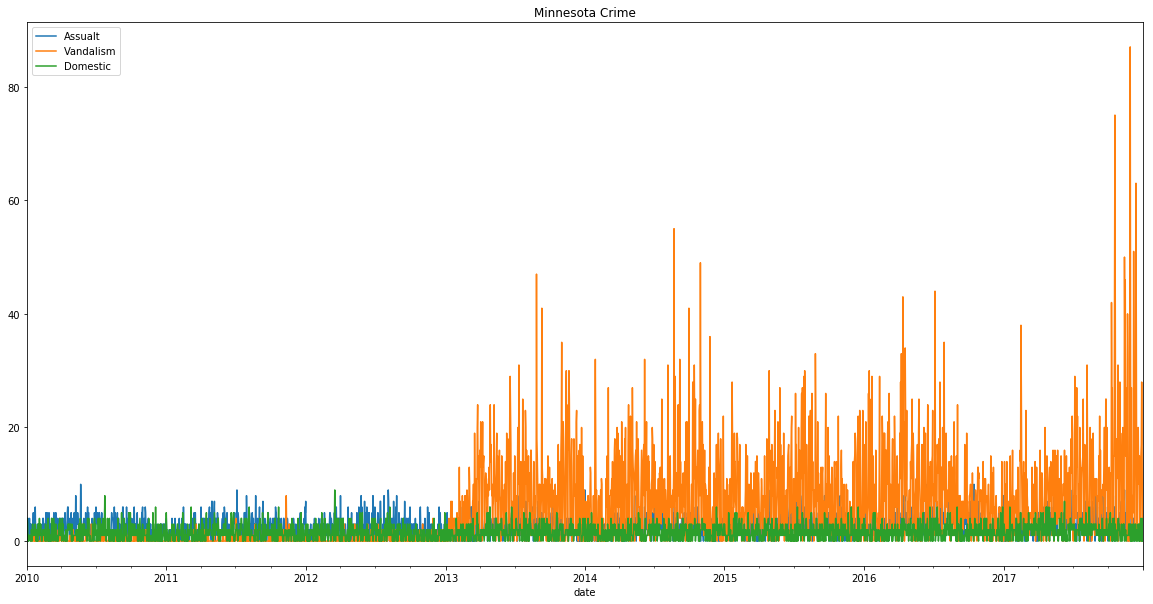

In [23]:
plt.subplot()

a1p = wolcrime[wolcrime['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

v1p = wolcrime[wolcrime['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = wolcrime[wolcrime['Description'] == "domestic violence"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])

plt.title('Minnesota Crime')

plt.show

<function matplotlib.pyplot.show>

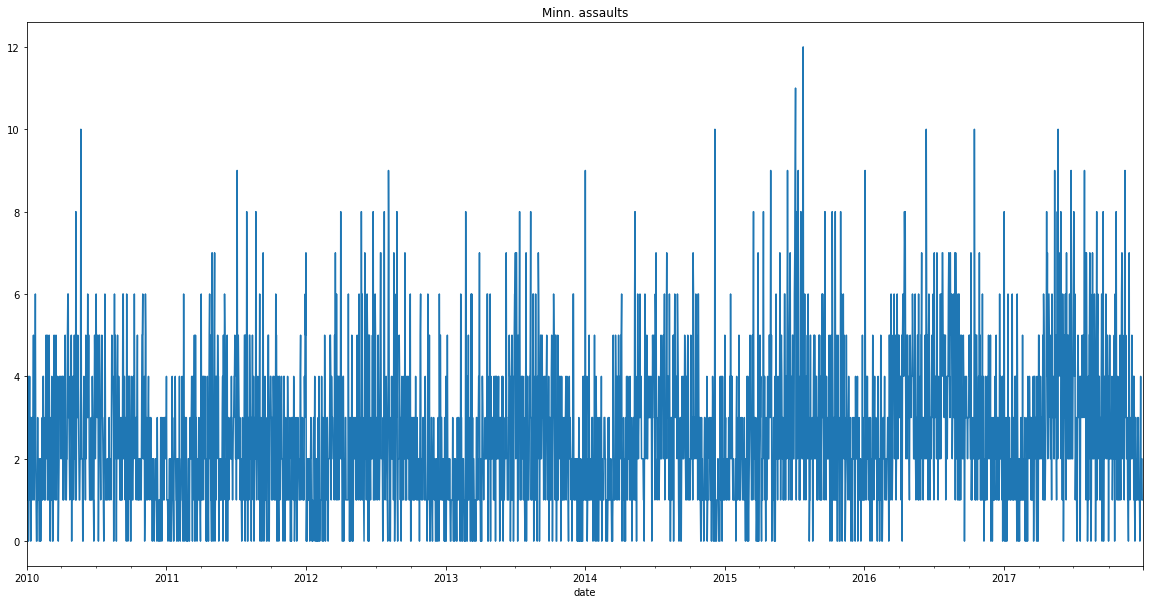

In [24]:
plt.subplot()

a1p = wolcrime[wolcrime['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

plt.title('Minn. assaults')

plt.show

<function matplotlib.pyplot.show>

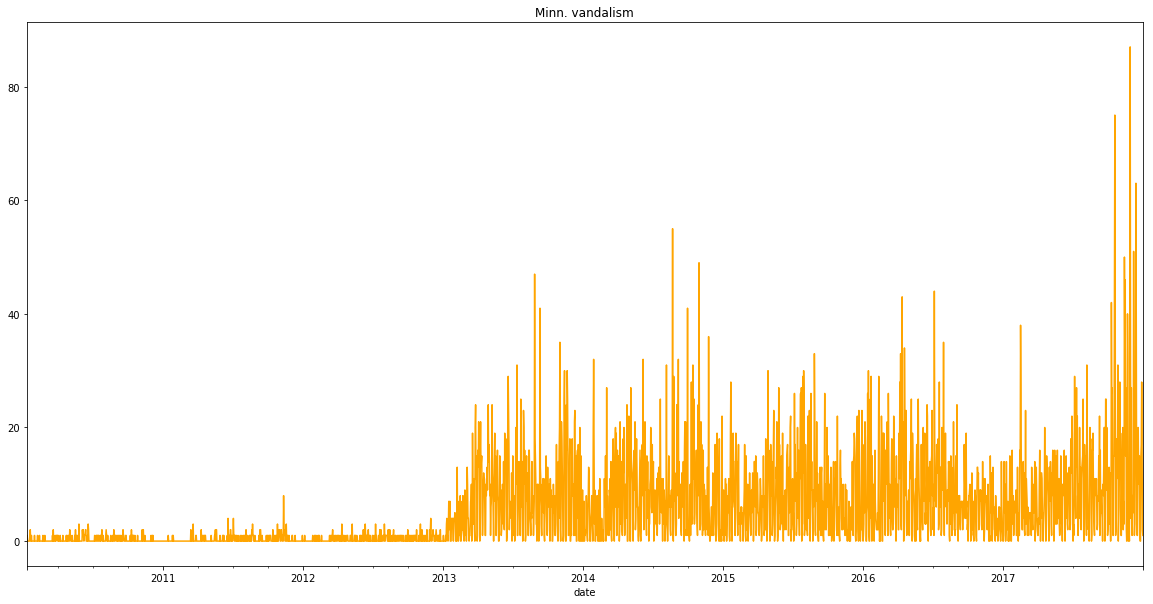

In [25]:
plt.subplot()


v1p = wolcrime[wolcrime['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot(figsize = (20, 10), color = 'orange')

plt.title('Minn. vandalism')

plt.show

<function matplotlib.pyplot.show>

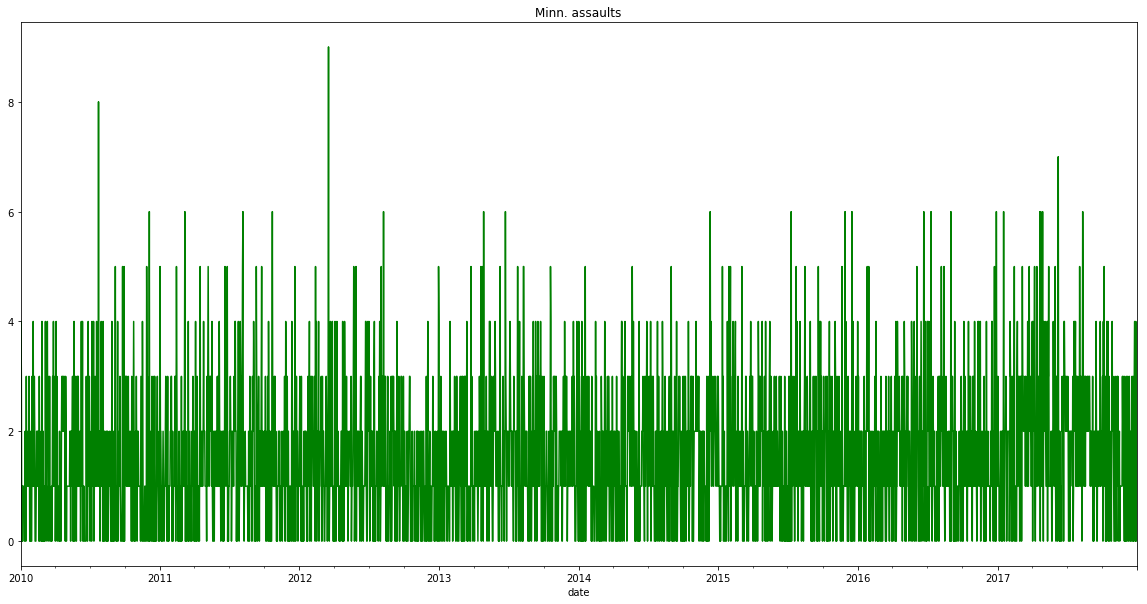

In [26]:
plt.subplot()

a1p = wolcrime[wolcrime['Description'] == "domestic violence"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10), color = 'green')

plt.title('Minn. assaults')

plt.show

# Crime vs Results

A day by day comparison of domestic violence violence and the games..

<function matplotlib.pyplot.show>

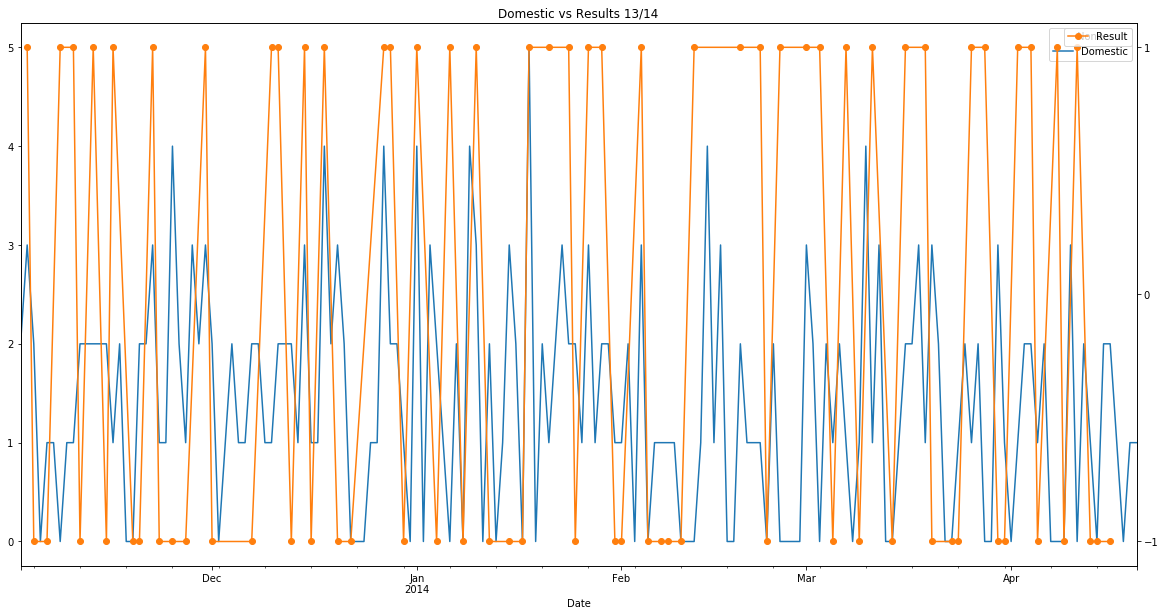

In [27]:

c1 = wolcrime.loc['2013-11-02':'2014-04-20']
ass1 = c1[c1['Description'] == "domestic violence"]['Description']
ass1.resample('D').count().plot()
plt.title('Domestic vs Results 13/14')
plt.legend([ 'Domestic'])

ctest5 = wolRes.loc['2013-11-02':'2014-04-20']
ctest5['wol Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend([ 'Result'])
plt.show

All seasons from 2010 to 2017...

<function matplotlib.pyplot.show>

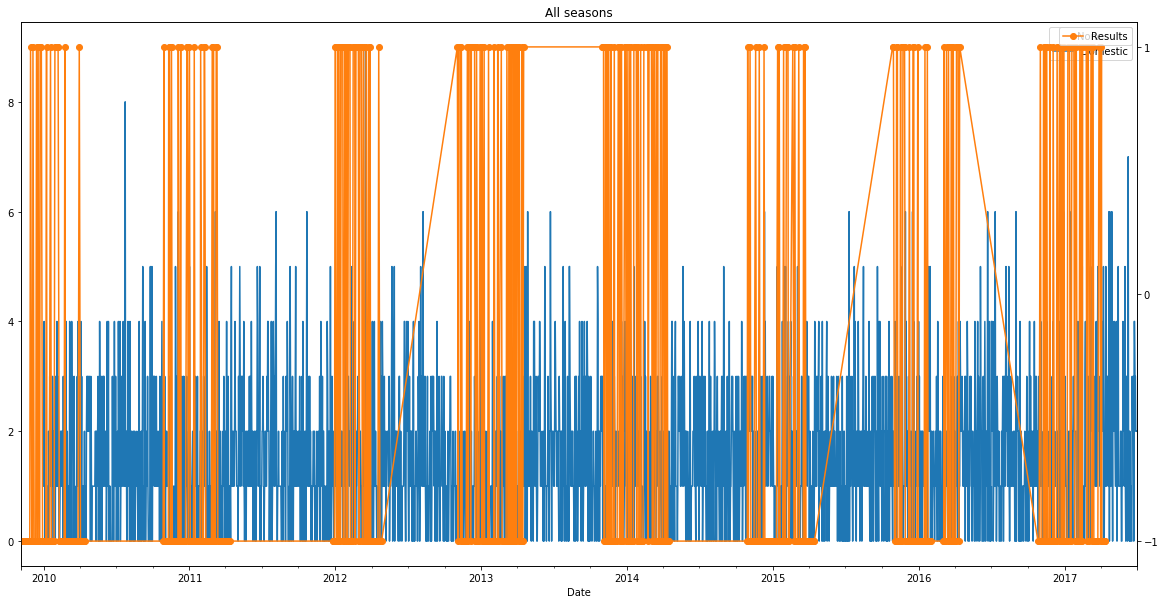

In [28]:
c1 = wolcrime.loc['2007-11-02':'2017-06-30']
ass1 = c1[c1['Description'] == "domestic violence"]['Description']
ass1.resample('D').count().plot()
plt.title('All seasons')
plt.legend(['Domestic'])

ctest7 = wolRes.loc['2007-11-02':'2017-06-30']
ctest7['wol Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend([ 'Results'])
plt.show

The 11/12 season was shorter

<function matplotlib.pyplot.show>

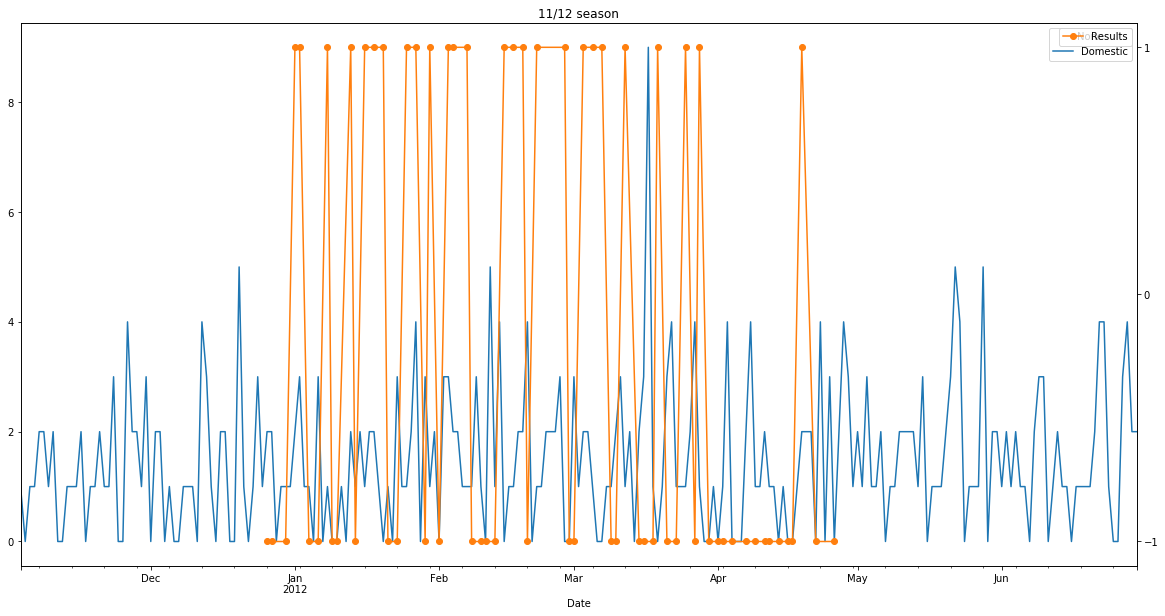

In [29]:
c1 = wolcrime.loc['2011-11-02':'2012-06-30']
ass1 = c1[c1['Description'] == "domestic violence"]['Description']
ass1.resample('D').count().plot()
plt.title('11/12 season')
plt.legend([ 'Domestic'])

ctest8 = wolRes.loc['2011-11-02':'2012-06-30']
ctest8['wol Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend([ 'Results'])
plt.show

# Minnesota Timberwolves Form

Binning the games by every 2 months gives us a better idea to when the winning and losing streaks occurred. The lowest sum was between December 2014 and January 2015 when their form was -24. The highest was from April to May 2016 with a sum of 1.  

In [30]:
chMonthly = wolRes.resample('2M').sum()
chMonthly = chMonthly.dropna(subset = ['wol Res'])
chMonthly.sort_values(by=['wol Res'])

,wol Res
Date,
2015-01-31,-24.0
2016-01-31,-20.0
2010-03-31,-18.0
2011-01-31,-16.0
2011-03-31,-16.0
2010-01-31,-14.0
2013-03-31,-12.0
2009-11-30,-11.0
2015-03-31,-11.0


Showing the best form with all three crimes... May 2016 is ignored as there was only a few games. It wasn't a full 2 months of matches.

<function matplotlib.pyplot.show>

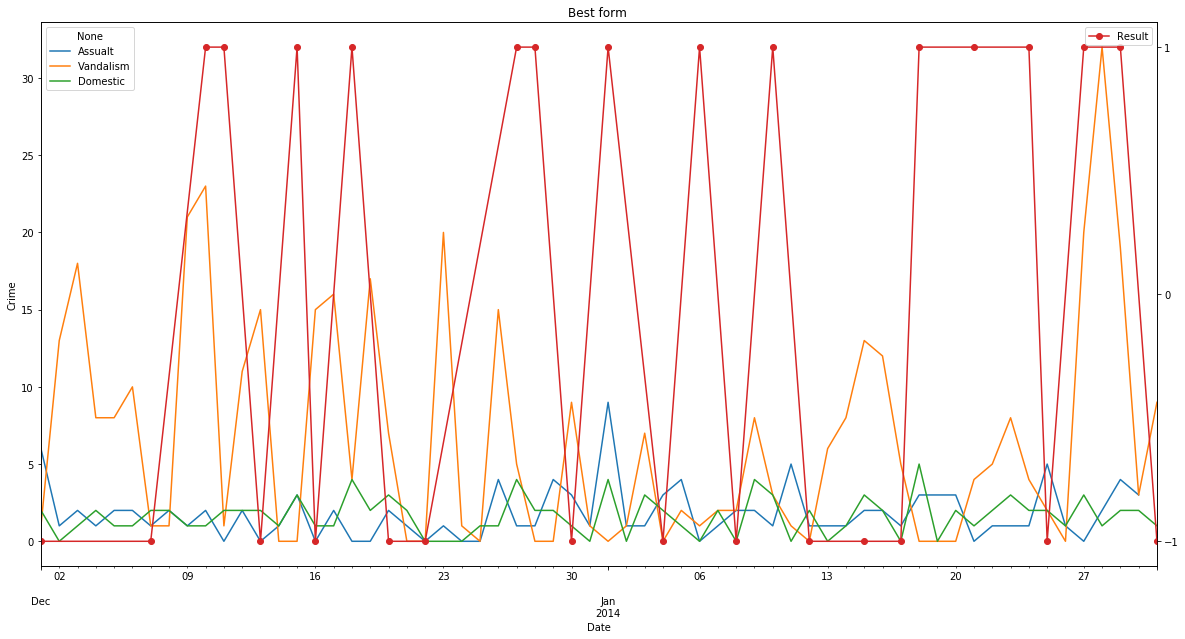

In [31]:
plt.subplot()

c = wolcrime.loc['2013-12-01':'2014-01-31']
a1 = c[c['Description'] == "assault"]['Description']
a1.resample('D').count().plot()

v1 = c[c['Description'] == "vandalism"]['Description']
v1.resample('D').count().plot()

d1 = c[c['Description'] == "domestic violence"]['Description']
d1.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])
pylab.ylabel('Crime')
plt.title('Best form ')

ct = wolRes.loc['2013-12-01':'2014-01-31']
ct['wol Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))


plt.legend([ "Result"])
plt.show

There seems to be a number of falls on the day of wins, with a few exceptions. There also is a number of rises when there is a loss, again with a few exceptions. 

Showing the worst form with all three crimes...

<function matplotlib.pyplot.show>

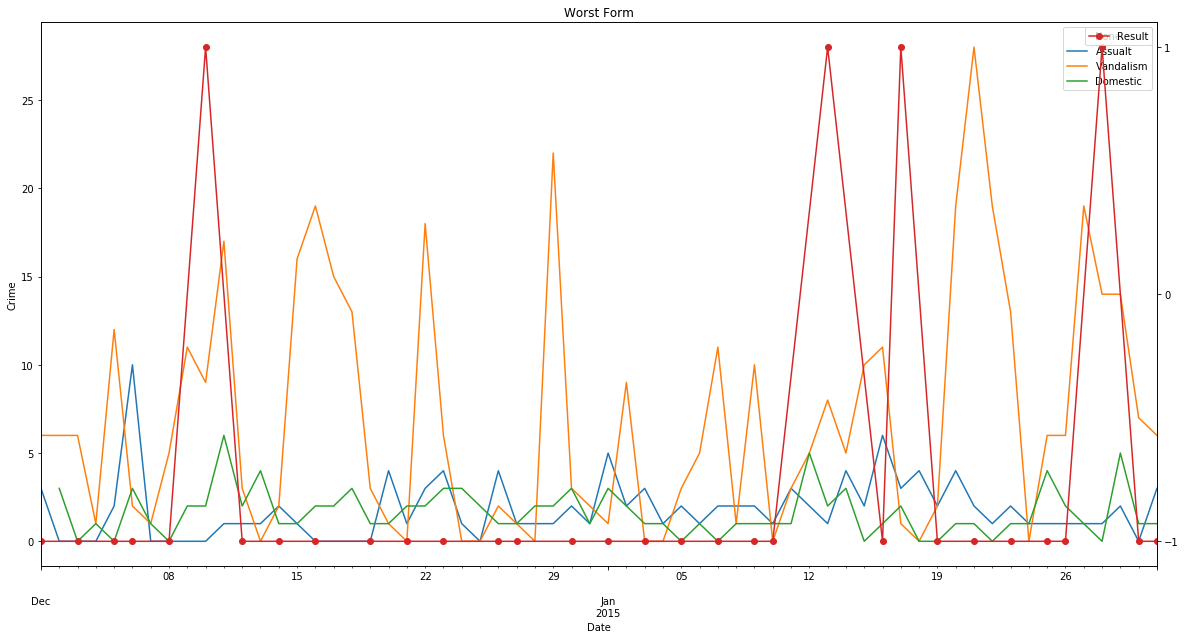

In [32]:
plt.subplot()

cp = wolcrime.loc['2014-12-01':'2015-01-31']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot()

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])

plt.title('Worst Form')
pylab.ylabel('Crime')
ctp = wolRes.loc['2014-12-01':'2015-01-31']
ctp['wol Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

 This graph is very interesting. There are a number of rises when games are lost, especially in terms of vandalism. On one occasion it rises to over 25. 

# Minnesota Timberwolves Win/Lose Streaks

A function to create streak columns

In [33]:
def streaks(wolRes, col):
    sign = np.sign(wolRes[col])
    s = sign.groupby((sign!=sign.shift()).cumsum()).cumsum()
    return wolRes.assign(win_streak=s.where(s>0, 0.0), lose_streak=s.where(s<0, 0.0).abs())

Running that function and adding it to the wolRes dataframe..

In [34]:
wolRes = streaks(wolRes, 'wol Res')

In [35]:
wolRes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 625 entries, 2009-11-04 to 2017-04-12
Data columns (total 4 columns):
Start (ET)     625 non-null object
wol Res        625 non-null int32
lose_streak    625 non-null float64
win_streak     625 non-null float64
dtypes: float64(2), int32(1), object(1)
memory usage: 22.0+ KB


Sorting the dataframe by the losing streak column..

In [36]:
wolRes.sort_values(by=['lose_streak'], ascending= False).head()

,Start (ET),wol Res,lose_streak,win_streak
Date,,,,
2011-12-30,7:00 pm,-1,18.0,0.0
2011-12-27,7:30 pm,-1,17.0,0.0
2010-03-28,6:00 pm,-1,16.0,0.0
2011-12-26,7:00 pm,-1,16.0,0.0
2015-01-10,8:00 pm,-1,15.0,0.0


Analysing the period where the worst losing streak occurred...

<function matplotlib.pyplot.show>

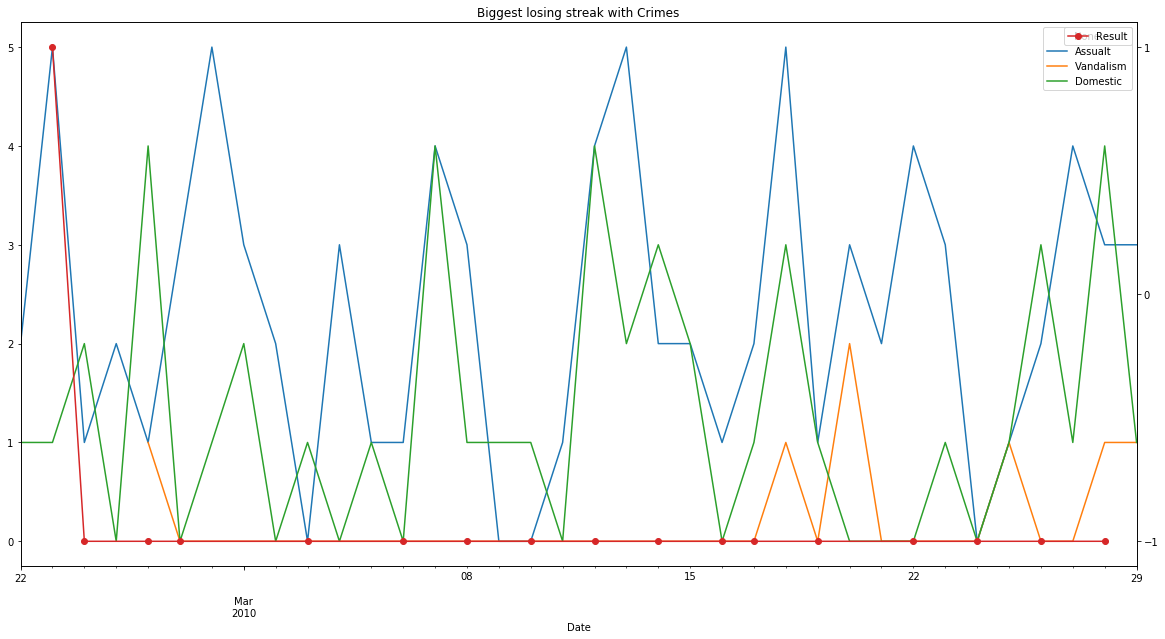

In [37]:
plt.subplot()

cp = wolcrime.loc['2010-02-22':'2010-03-29']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot()

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])

plt.title('Biggest losing streak with Crimes')

ctp = wolRes.loc['2010-02-22':'2010-03-29']
ctp['wol Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

Text(0.5,1,'Longest losing streak with Crimes')

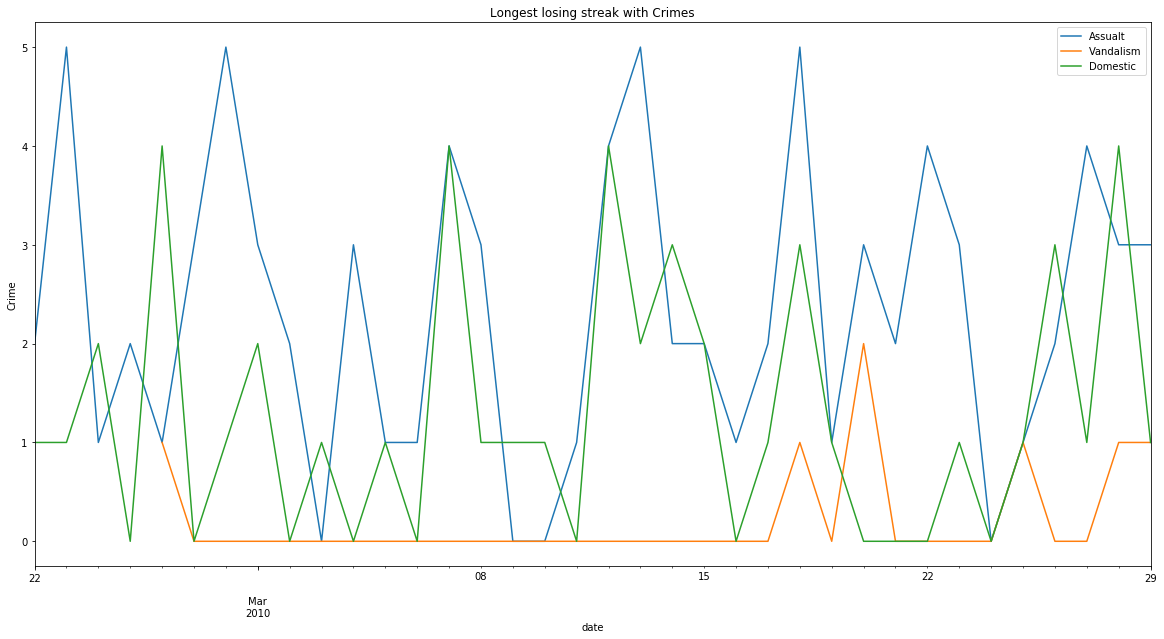

In [38]:
plt.subplot()

cp = wolcrime.loc['2010-02-22':'2010-03-29']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])
pylab.ylabel('Crime')
plt.title('Longest losing streak with Crimes')

The crimes are inconsistent during this period, and often drop for the actual day of the game. On many occasions there are no crimes reported on these days. 

Sorting the dataframe by the win streak column

In [39]:
wolRes.sort_values(wolRes.columns[3], ascending = False).head()

,Start (ET),wol Res,lose_streak,win_streak
Date,,,,
2012-12-15,7:00 pm,1,0.0,4.0
2010-02-06,7:00 pm,1,0.0,4.0
2013-11-03,7:30 pm,1,0.0,4.0
2012-03-07,7:00 pm,1,0.0,3.0
2014-02-22,9:00 pm,1,0.0,3.0


Analysing the period where that win streak took place...

<function matplotlib.pyplot.show>

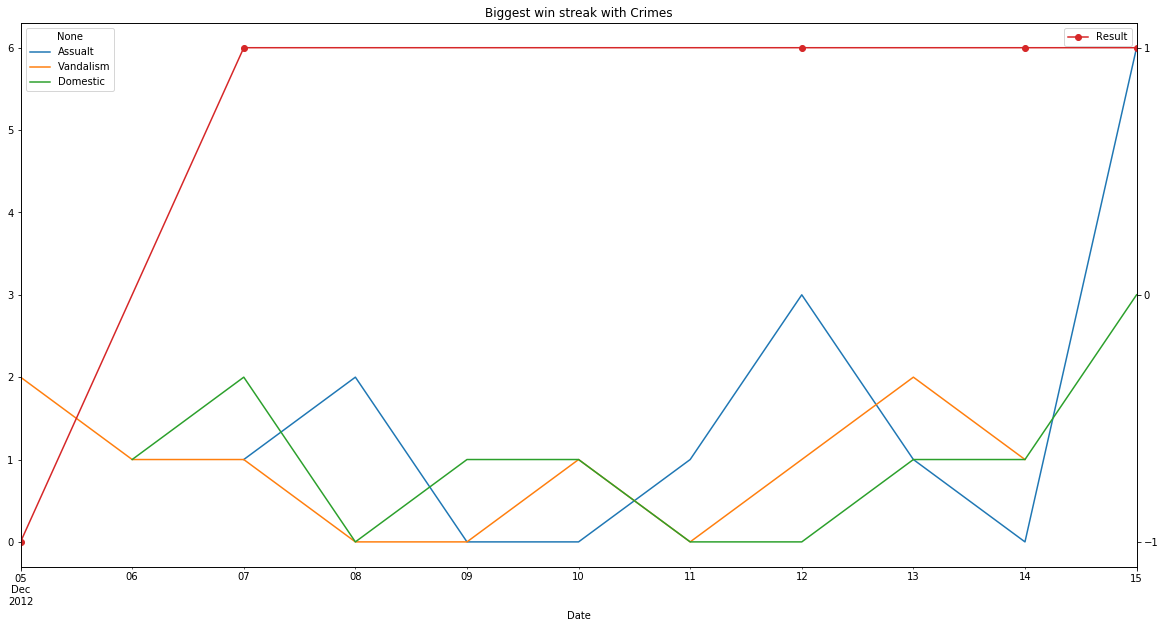

In [40]:
plt.subplot()

cp = wolcrime.loc['2012-12-05':'2012-12-15']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot()

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])

plt.title('Biggest win streak with Crimes')

ctp = wolRes.loc['2012-12-05':'2012-12-15']
ctp['wol Res'].plot(style='o-', figsize = (20, 10), secondary_y = True).yaxis.set_major_locator(MaxNLocator(integer=True))
plt.legend(['Result'])
plt.show

Text(0.5,1,'Biggest win streak with Crimes')

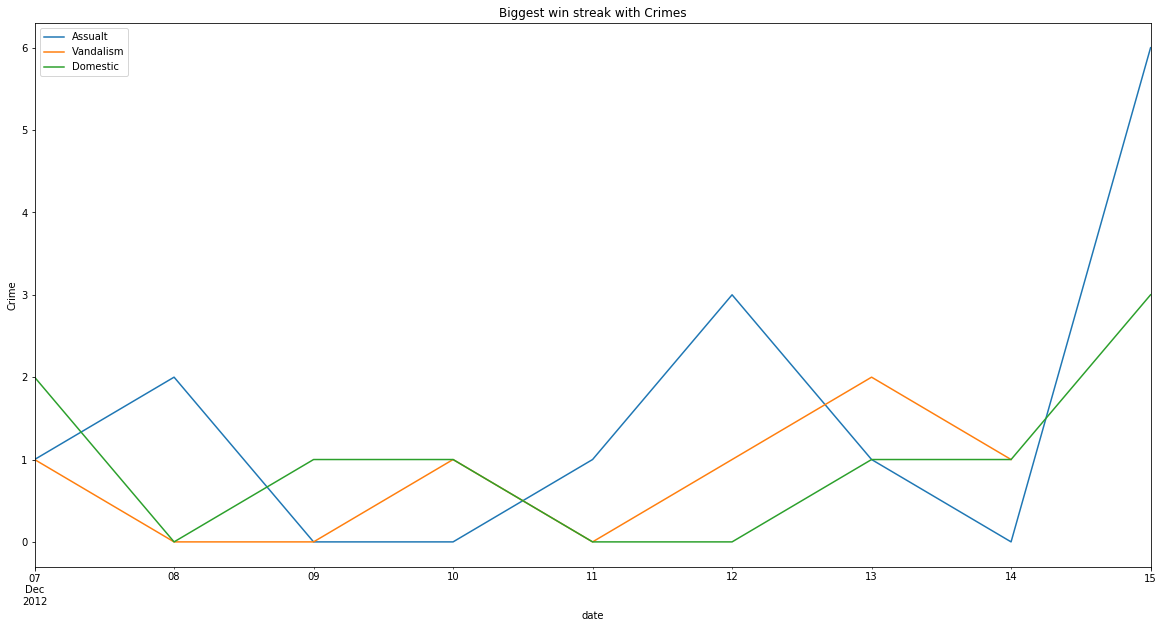

In [41]:
plt.subplot()

cp = wolcrime.loc['2012-12-07':'2012-12-15']
a1p = cp[cp['Description'] == "assault"]['Description']
a1p.resample('D').count().plot(figsize = (20, 10))

v1p = cp[cp['Description'] == "vandalism"]['Description']
v1p.resample('D').count().plot()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
d1p.resample('D').count().plot()
plt.legend(['Assualt', 'Vandalism', 'Domestic'])
pylab.ylabel('Crime')

plt.title('Biggest win streak with Crimes')

All three crimes see a rise, despite this being their best win streak

### Comparing longest Streaks

In [42]:
cp = wolcrime.loc['2010-02-24':'2010-03-28']

print('Daily average for Losing Streak:')
a1p = cp[cp['Description'] == "assault"]['Description']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Description'] == "vandalism"]['Description']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Daily average for Winning Streak:')

cp0 = wolcrime.loc['2012-12-07':'2012-12-15']
a1p0 = cp0[cp0['Description'] == "assault"]['Description']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Description'] == "vandalism"]['Description']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Description'] == "domestic violence"]['Description']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)



Daily average for Losing Streak:
Assault = 2.242424242424242
Vandalism = 0.1935483870967742
Domestic = 1.3333333333333333
 
Daily average for Winning Streak:
Assault = 1.5555555555555556
Vandalism = 0.75
Domestic = 1.0


As you can see Assault and Domestic violence is lower during the win streak. Vandalism is higher marginally. One thing to note here is how low the actual numbers are. Also the win streak comes in the month of December and only lasts 8 days, whereas the losing streak comes in March and lasts over a month. 

### Comparison with periods before Streaks

In [43]:
cp = wolcrime.loc['2012-11-30':'2012-12-07']

print('Period before Winning Streak')
a1p = cp[cp['Description'] == "assault"]['Description']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Description'] == "vandalism"]['Description']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Winning Streak:')

cp0 = wolcrime.loc['2012-12-07':'2012-12-15']
a1p0 = cp0[cp0['Description'] == "assault"]['Description']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Description'] == "vandalism"]['Description']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Description'] == "domestic violence"]['Description']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)

Period before Winning Streak
Assault = 1.375
Vandalism = 0.875
Domestic = 1.375
 
Period of Winning Streak:
Assault = 1.5555555555555556
Vandalism = 0.75
Domestic = 1.0


There is a drop in Vandalism and Domestic violence but not Assault. Again, the figures are very low in any case. 

In [44]:
cp = wolcrime.loc['2010-01-20':'2010-02-24']

print('Period before Losing Streak')
a1p = cp[cp['Description'] == "assault"]['Description']
assault = a1p.resample('D').count().mean()

v1p = cp[cp['Description'] == "vandalism"]['Description']
vandalism = v1p.resample('D').count().mean()

d1p = cp[cp['Description'] == "domestic violence"]['Description']
domestic = d1p.resample('D').count().mean()

print ('Assault =', assault)
print ('Vandalism =', vandalism)
print ('Domestic =', domestic)

print(' ')
print('Period of Losing Streak:')

cp0 = wolcrime.loc['2010-02-24':'2010-03-28']
a1p0 = cp0[cp0['Description'] == "assault"]['Description']
assault1 = a1p0.resample('D').count().mean()

v1p0 = cp0[cp0['Description'] == "vandalism"]['Description']
vandalism1 = v1p0.resample('D').count().mean()

d1p0 = cp0[cp0['Description'] == "domestic violence"]['Description']
domestic1 = d1p0.resample('D').count().mean()

print ('Assault =', assault1)
print ('Vandalism =', vandalism1)
print ('Domestic =', domestic1)

Period before Losing Streak
Assault = 1.9166666666666667
Vandalism = 0.16129032258064516
Domestic = 1.3611111111111112
 
Period of Losing Streak:
Assault = 2.242424242424242
Vandalism = 0.1935483870967742
Domestic = 1.3333333333333333


There is a rise in Assault and a marginal one in Vandalism. Domestic violence sees a small drop. 